# DSCI 503 - Homework 05
### Nicholas Allen
Due February 13, 2022

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.array(np.random.uniform(low=0, high=10, size=40))
Z = Z.reshape(5,8)
Z = np.round(Z,2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print(f'Row 3:    {Z[2,:]}')
print(f'Column 6: {Z[:,5]}')

Row 3:    [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
print(f'Row Sums:    {np.sum(Z, axis=1)}')
print(f'Column Sums: {np.sum(Z, axis=0)}')
print(f'Array Sum:   {np.sum(Z)}')

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)
x1 = np.array(np.random.normal(50,10,1000))
x2 = np.array(np.random.normal(20,5,1000))
x3 = np.array(np.random.normal(100,30,1000))
x4 = np.array(np.random.normal(10,2,1000))
x1 = x1.reshape(1000,1)
x2 = x2.reshape(1000,1)
x3 = x3.reshape(1000,1)
x4 = x4.reshape(1000,1)
X = np.hstack([x1, x2, x3, x4])
X = np.round(X, 2)
print(X.shape)

(1000, 4)


In [6]:
print(X[:6,:])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
c_means = np.mean(X, axis=0)
c_std = np.std(X, axis=0)
print(f'Column means:               {np.round(c_means,2)}')
print(f'Column standard deviations: {np.round(c_std,2)}')

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [8]:
W = (X - c_means) / c_std
W_means = np.mean(W, axis=0)
W_std = np.std(W, axis=0)
print(f'Column means:               {np.round(W_means,2)}')
print(f'Column standard deviations: {np.round(W_std,2)}')
#I believe these are supposed to be very small numbers but is there a way to display in sceinteific notation?

Column means:               [ 0. -0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_table('auto_mpg.txt')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
auto.mean()
#What does this warning mean? Am i supposed to provide an argument to .mean()

C:\Users\Nick\AppData\Local\Temp/ipykernel_4732/2812584194.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auto.mean()


mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto.iloc[:,3])

In [13]:
asia_auto = auto[auto.iloc[:,3] == regions[0]]
eur_auto = auto[auto.iloc[:,3] == regions[1]]
usa_auto = auto[auto.iloc[:,3] == regions[2]]
print(f'Number of cars manufactured in Asia:   {asia_auto.shape}')
print(f'Number of cars manufactured in Europe: {eur_auto.shape}')
print(f'Number of cars manufactured in USA:    {len(usa_auto)}')

Number of cars manufactured in Asia:   (79, 5)
Number of cars manufactured in Europe: (70, 5)
Number of cars manufactured in USA:    249


In [14]:
asia_means = np.array(auto[auto.iloc[:,3] == regions[0]][['mpg','cyl','wt']].mean())
eur_means = np.array(auto[auto.iloc[:,3] == regions[1]][['mpg','cyl','wt']].mean())
usa_means = np.array(auto[auto.iloc[:,3] == regions[2]][['mpg','cyl','wt']].mean())
mean_df = (asia_means, eur_means, usa_means)
mean_df = np.hstack([regions.reshape(3,1), mean_df])
mean_df = pd.DataFrame(mean_df)
mean_df.rename(columns={0: "Region", 1: "mpg", 2 : "cyl", 3: 'wt'}, inplace=True)
mean_df.set_index('Region', inplace = True)
mean_df
#Likely not the most effcicent method. I would love feedback on alternate, quicker methods

,mpg,cyl,wt
Region,,,
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.3
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

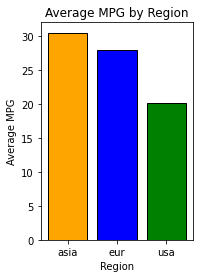

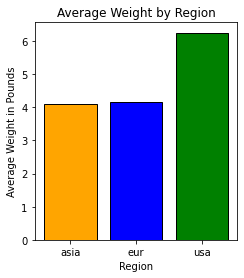

<Figure size 576x288 with 0 Axes>

In [15]:
colors1 = ['orange', 'blue', 'green']
plt.subplot(1,2,1)
plt.bar(x=mean_df.index, height=mean_df.iloc[:,0], color=colors1, edgecolor='k')
plt.xlabel('Region')
plt.ylabel('Average MPG')
plt.title("Average MPG by Region")
plt.figure(figsize=[8,4])

plt.subplot(1,2,2)
plt.bar(x=mean_df.index, height=mean_df.iloc[:,1], color=colors1, edgecolor='k')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')
plt.title("Average Weight by Region")
plt.figure(figsize=[8,4])

plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

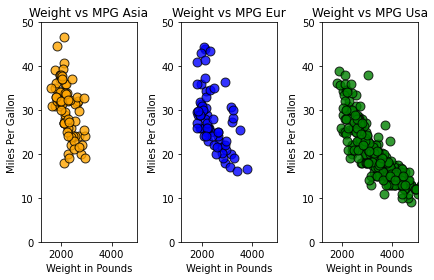

In [16]:
for i in range(len(regions)):
    plt.subplot(1,3,i+1)
    plt.scatter(x=auto[auto.region == regions[i]].loc[:,'wt'], y=auto[auto.iloc[:,3] == regions[i]].loc[:,'mpg'], s=80, alpha=0.8,
                color=colors1[i], edgecolor='black')
    plt.xlim([1200,5000])
    plt.ylim([0,50])
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Weight vs MPG {regions[i].title()}')

plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto.iloc[:,1])
print(cyl_values)

[3 4 5 6 8]


In [18]:
cyl_counts_by_region = pd.crosstab(auto.loc[:,'cyl'],auto.loc[:,'region'] )
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


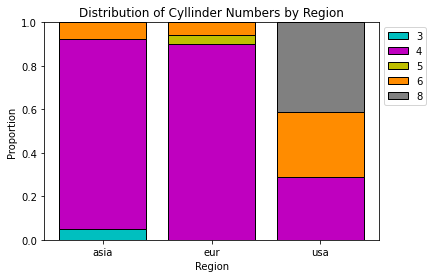

In [21]:
cyl_props_by_region = cyl_counts_by_region / cyl_counts_by_region.sum()
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ['c', 'm', 'y', 'darkorange', 'gray']
plt.figure(figsize=[6,4])
for i in range(len(cyl_props_by_region)):
    plt.bar(x=cyl_props_by_region.columns, height=cyl_props_by_region.iloc[i,:], label=cyl_props_by_region.index[i], color=colors2[i], edgecolor='k', bottom=bar_bottoms.iloc[i,:])
    plt.xlabel('Region')
    plt.ylabel('Proportion')
    plt.title('Distribution of Cyllinder Numbers by Region')
    plt.legend(bbox_to_anchor = (1,1))
plt.show()